In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
valid_datagen=ImageDataGenerator(rescale=1./255)
valid_gen=valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/handgesturedataset/dataset/test',
    target_size=(128,128),
    batch_size=30,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 30 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_gen=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/handgesturedataset/dataset/train',
    target_size=(128,128),
    batch_size=198,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 2376 images belonging to 6 classes.


In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/ibmhandgesture.h5')

In [ ]:
x_test,y_test=valid_gen.__getitem__(0)

In [ ]:
import numpy as np
y_test=np.argmax(y_test,axis=1)

In [ ]:
y_test

array([5, 4, 1, 2, 5, 4, 0, 3, 1, 5, 3, 3, 2, 1, 1, 0, 2, 5, 2, 0, 1, 4,
       3, 4, 3, 4, 0, 5, 2, 0])

In [ ]:
y_pred=model.predict(x_test)

1/1 [==============================] - 1s 516ms/step


In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([5, 4, 1, 2, 5, 4, 0, 3, 1, 5, 5, 3, 2, 1, 1, 0, 1, 5, 2, 0, 1, 4,
       3, 4, 3, 4, 0, 5, 2, 0])

In [ ]:
import keras.backend as K 
def accuracy(y_true, y_pred):
  return K.mean(K.equal(y_true, K.round(y_pred)))

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print("Gesture Recognition model accuracy:{:.4f}".format(accuracy(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Gesture Recognition model accuracy:0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
accu = np.count_nonzero(np.equal(y_pred,y_test))/x_test.shape[0]
print("Accuracy: {} %".format(accu*100))

Accuracy: 93.33333333333333 %


In [ ]:
classes = list(train_gen.class_indices.keys())

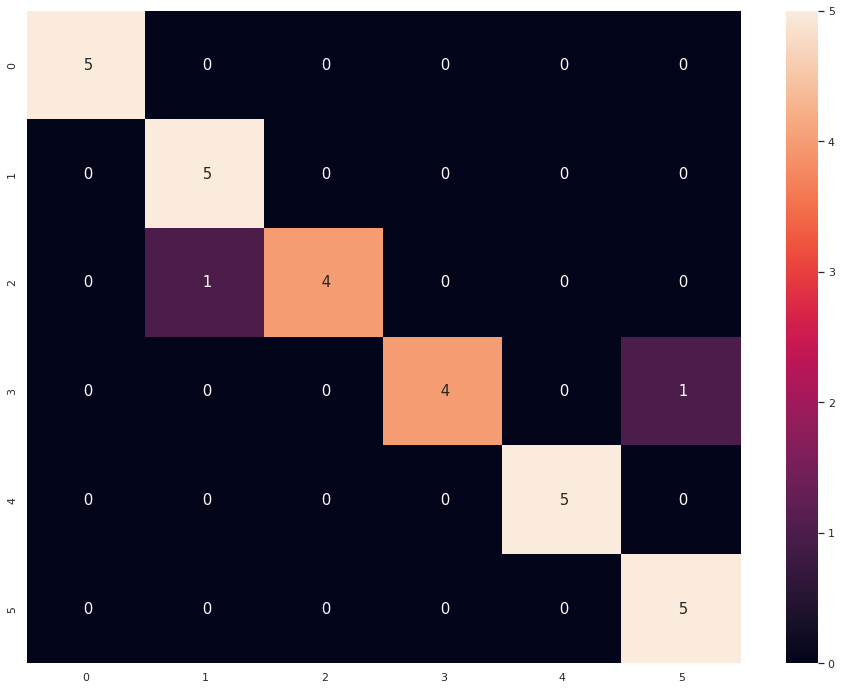

In [ ]:
#Confusion matrix for test data Classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_cmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred),index=classes, columns=classes)
sns.set(font_scale=1.0)
fig,ax = plt.subplots(figsize=(16,12))
sns.heatmap(df_cmatrix, annot=True,annot_kws={"size": 15},fmt='2g')

In [ ]:
import sklearn.metrics as metrics

In [ ]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred,pos_label=1)

In [ ]:
fpr

array([0.  , 0.24, 0.44, 0.76, 0.8 , 1.  ])

In [ ]:
tpr

array([0., 0., 0., 0., 1., 1.])

In [ ]:
threshold

array([6, 5, 4, 2, 1, 0])

In [ ]:
roc_auc = metrics.auc(fpr,tpr)

In [ ]:
roc_auc

0.21999999999999997

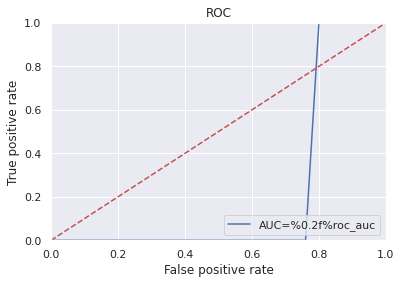

In [ ]:
import matplotlib.pyplot as plt
plt.title("ROC")
plt.plot(fpr,tpr,'b',label='AUC=%0.2f%roc_auc')
plt.legend(loc = "lower right")

plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()